# Problem Statement:
The telecom industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.



# Import required packages

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Since the number of columns are more, we are adjusting the output window to max.

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# pd.reset_option('display.max_columns')

In [3]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

# Reading the data

In [4]:
# Reding data and storing to 'tele_df_og' as original df & 'tele_df' for analysis:

tele_df_og = pd.read_csv('telecom_churn_data.csv')

tele_df = tele_df_og.copy(deep=True)

In [5]:
tele_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

- Inspecting the datafram

In [6]:
# Check the number of rows and columns in the dataframe
tele_df.shape

(99999, 226)

In [7]:
# Check the column-wise info of the dataframe
tele_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [8]:
# Check the summary for the numeric columns 
tele_df.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

# Data Cleaning & Preperation:

## Segregating ID, Date, Categorical & Numerical columns

In [9]:
# Columns in tele_df
cl = list(tele_df.columns)

In [10]:
# Seggregating ID columns to a list
id_cl = ['mobile_number', 'circle_id']


In [11]:
# Seggregating Date columns to a list
date_cl =  list(tele_df.columns[tele_df.columns.str.contains('date')])
print(date_cl)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [12]:
# Finding Categorical columns to a list
# Categorical columns can be segregated by checking with columns with lesser unique values in each fields except for date and ID.
new_df = tele_df. drop(labels=id_cl+date_cl, axis=1)

In [13]:
# Columns with lower unique values:
x=pd.DataFrame(new_df.nunique())
x[x[0]<=20]

,0
loc_og_t2o_mou,1
std_og_t2o_mou,1
loc_ic_t2o_mou,1
std_og_t2c_mou_6,1
std_og_t2c_mou_7,1
std_og_t2c_mou_8,1
std_og_t2c_mou_9,1
std_ic_t2o_mou_6,1
std_ic_t2o_mou_7,1
std_ic_t2o_mou_8,1


**Out of the above, we can see that the columns containing *user* in their header names are categorical variables**

In [14]:
# Seggregating Categorical columns to a list
catg_cl =  list(tele_df.columns[tele_df.columns.str.contains('user')])
print(catg_cl)

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [15]:
# Remaining as Numerical variables
num_cl=cl[:]
for i in catg_cl+date_cl+id_cl:
    if i in num_cl:
        num_cl.remove(i)

In [16]:
print('No.of id columns: {}\nNo.of date columns: {}\nNo.of Categorical columns: {}\nNo.of Numerical columns: {}\nTotal: {}'.
     format(len(id_cl),len(date_cl),len(catg_cl),len(num_cl),len(cl)))

No.of id columns: 2
No.of date columns: 12
No.of Categorical columns: 8
No.of Numerical columns: 204
Total: 226


**Removing `date` and `id` related fields as these are less significant in model creation**

In [17]:
tele_df = tele_df[catg_cl+num_cl]

In [18]:
tele_df.shape

(99999, 212)

## Treating null values in dataframe

In [19]:
# function to calculate missing value ratio:
def missing_ratio(x):
    missing_data = ((x.isnull().sum(axis = 0)/len(x.index))*100).round(2)
    a_missing_data_df = pd.DataFrame(missing_data)
    a_missing_data_df = a_missing_data_df.rename(columns={0: "Missing_value_ratio"})
    return(a_missing_data_df)

In [20]:
# Check for null/missing values in dataframe
a_missing_data_df = missing_ratio(tele_df)

In [21]:
# Fields with missing values in tele_df soarted as per their missing values
a_missing_data_df[a_missing_data_df.Missing_value_ratio!=0].sort_values('Missing_value_ratio',ascending=False)

,Missing_value_ratio
night_pck_user_6,74.85
arpu_3g_6,74.85
max_rech_data_6,74.85
count_rech_2g_6,74.85
count_rech_3g_6,74.85
av_rech_amt_data_6,74.85
total_rech_data_6,74.85
fb_user_6,74.85
arpu_2g_6,74.85
arpu_3g_7,74.43


### Dealing with Nan values in Categorical Variable**

In [22]:
for i in catg_cl:
    print('unique values in col {} >>>>>>\n{}\n'.format(i,tele_df[i].value_counts(dropna=False)))

unique values in col night_pck_user_6 >>>>>>
NaN    74846
0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

unique values in col night_pck_user_7 >>>>>>
NaN    74428
0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64

unique values in col night_pck_user_8 >>>>>>
NaN    73660
0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64

unique values in col night_pck_user_9 >>>>>>
NaN    74077
0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64

unique values in col fb_user_6 >>>>>>
NaN    74846
1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

unique values in col fb_user_7 >>>>>>
NaN    74428
1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64

unique values in col fb_user_8 >>>>>>
NaN    73660
1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64

unique values in col fb_user_9 >>>>>>
NaN    74077
1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64



- **Since we can see 2 categories [ 0 & 1 ], also as there are >70% missing value we will impute the missing values as a third category by `2`**


In [23]:
for i in catg_cl:
    tele_df[i].fillna(2,inplace = True)

In [24]:
# verifying unique value
for i in catg_cl:
    print('unique values in col {} : {}\n'.format(i,tele_df[i].unique()))

unique values in col night_pck_user_6 : [0. 2. 1.]

unique values in col night_pck_user_7 : [0. 2. 1.]

unique values in col night_pck_user_8 : [0. 2. 1.]

unique values in col night_pck_user_9 : [2. 0. 1.]

unique values in col fb_user_6 : [1. 2. 0.]

unique values in col fb_user_7 : [1. 2. 0.]

unique values in col fb_user_8 : [1. 2. 0.]

unique values in col fb_user_9 : [2. 1. 0.]



In [25]:
# Re-visiting null/missing values in dataframe
a_missing_data_df = missing_ratio(tele_df)
a_missing_data_df[a_missing_data_df.Missing_value_ratio!=0].sort_values('Missing_value_ratio',ascending=False)

,Missing_value_ratio
count_rech_3g_6,74.85
total_rech_data_6,74.85
av_rech_amt_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
count_rech_2g_6,74.85
arpu_3g_6,74.85
max_rech_data_7,74.43
count_rech_2g_7,74.43
av_rech_amt_data_7,74.43


### Checking for fields with single values as 0 & Null.
- Dropping these columns as these wouldn't add value to model building.

In [26]:
print(tele_df['loc_og_t2o_mou'].value_counts())
print(tele_df['std_og_t2o_mou'].value_counts())
print(tele_df['loc_ic_t2o_mou'].value_counts())

0.0    98981
Name: loc_og_t2o_mou, dtype: int64
0.0    98981
Name: std_og_t2o_mou, dtype: int64
0.0    98981
Name: loc_ic_t2o_mou, dtype: int64


In [27]:
# lets remove above columns as it only contains 0 values
tele_df.drop(columns=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1,inplace=True)
tele_df.shape

(99999, 209)

In [28]:
print(tele_df['std_og_t2c_mou_6'].value_counts())
print(tele_df['std_og_t2c_mou_7'].value_counts())
print(tele_df['std_og_t2c_mou_8'].value_counts())

0.0    96062
Name: std_og_t2c_mou_6, dtype: int64
0.0    96140
Name: std_og_t2c_mou_7, dtype: int64
0.0    94621
Name: std_og_t2c_mou_8, dtype: int64


In [29]:
# Lets remove above 3 cols as it only contains 0 values
tele_df.drop(columns=['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'],axis=1,inplace=True)
tele_df.shape

(99999, 206)

In [30]:
# Lets remove above 3 cols as it only contains 0 values
print(tele_df['std_ic_t2o_mou_6'].value_counts())
print(tele_df['std_ic_t2o_mou_7'].value_counts())
print(tele_df['std_ic_t2o_mou_8'].value_counts())

0.0    96062
Name: std_ic_t2o_mou_6, dtype: int64
0.0    96140
Name: std_ic_t2o_mou_7, dtype: int64
0.0    94621
Name: std_ic_t2o_mou_8, dtype: int64


In [31]:
tele_df.drop(columns=['std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1,inplace=True)
tele_df.shape

(99999, 203)

In [32]:
# Re-visiting null/missing values in dataframe
a_missing_data_df = missing_ratio(tele_df)
a_missing_data_df[a_missing_data_df.Missing_value_ratio!=0].sort_values('Missing_value_ratio',ascending=False)

,Missing_value_ratio
count_rech_2g_6,74.85
arpu_3g_6,74.85
total_rech_data_6,74.85
max_rech_data_6,74.85
arpu_2g_6,74.85
count_rech_3g_6,74.85
av_rech_amt_data_6,74.85
total_rech_data_7,74.43
av_rech_amt_data_7,74.43
arpu_2g_7,74.43


### Checking for fields with > 70% missing values:

- **We can see that fields of each month has equal number of missing values,**
    - **For example:**
        - **for month 9, we see that there are fields with mou, ic & og-other columns to have 7.75% missing values**
        - **and rest of the continuous variables to have 74.08% missing values**

In [33]:
# Check into month 9 missing value%:
month_9 = a_missing_data_df[(a_missing_data_df.index.str.contains('9')) 
                  & (a_missing_data_df.Missing_value_ratio!=0)].sort_values('Missing_value_ratio',ascending=False)
month_9

,Missing_value_ratio
arpu_2g_9,74.08
arpu_3g_9,74.08
av_rech_amt_data_9,74.08
count_rech_3g_9,74.08
count_rech_2g_9,74.08
max_rech_data_9,74.08
total_rech_data_9,74.08
std_ic_t2o_mou_9,7.75
loc_ic_mou_9,7.75
std_ic_t2t_mou_9,7.75


- **There are more than 70% missing values under reccharge based columns.**
- **These cases can be considered as scenarios where the customers haven't recharged in that perticular month of year.**
- **Also, we can see in the summary of numeric columns, most of these columns have 1 as the least value.**
- **Hence it is best to impute the recharge based columns with 0 for missing values.** 

In [34]:
# Segregating recharge and average recharge based columns to a list.

rech_cl = list(tele_df.columns[tele_df.columns.str.contains('rech')])
arpu_cl = list(tele_df.columns[tele_df.columns.str.contains('arpu')])
arpu_cl+rech_cl

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [35]:
for i in arpu_cl+rech_cl:
    tele_df[i].fillna(0,inplace = True)

In [36]:
# Re-visiting null/missing values in dataframe
a_missing_data_df = missing_ratio(tele_df)
a_missing_data_df[a_missing_data_df.Missing_value_ratio!=0].sort_values('Missing_value_ratio',ascending=False)

,Missing_value_ratio
ic_others_9,7.75
std_ic_t2t_mou_9,7.75
loc_ic_mou_9,7.75
loc_og_t2m_mou_9,7.75
loc_ic_t2f_mou_9,7.75
loc_ic_t2m_mou_9,7.75
loc_og_t2f_mou_9,7.75
loc_ic_t2t_mou_9,7.75
loc_og_t2c_mou_9,7.75
og_others_9,7.75


In [37]:
tele_df.shape

(99999, 203)

### Checking for fields with lower missing values:

- **Missing value treatment for following columns : 'onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9'**

In [38]:
tele_df[['onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9']].describe()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000
mean,132.395875,133.670805,133.018098,130.302327
std,297.207406,308.794148,308.951589,308.477668
min,0.000000,0.000000,0.000000,0.000000
25%,7.380000,6.660000,6.460000,5.330000
50%,34.310000,32.330000,32.360000,29.840000
75%,118.740000,115.595000,115.860000,112.130000
max,7376.710000,8157.780000,10752.560000,10427.460000


**Comment:**
 - We will impute NaN with median values.
 - also there is high skewness in the data as mean and median are far from each other


In [39]:
for i in ['onnet_mou_6','onnet_mou_7','onnet_mou_8','onnet_mou_9']:
    tele_df[i].fillna(tele_df[i].median(),inplace=True)

In [40]:
# Re-visiting null/missing values in dataframe
a_missing_data_df = missing_ratio(tele_df)
a_missing_data_df[a_missing_data_df.Missing_value_ratio!=0].sort_values('Missing_value_ratio',ascending=False)

,Missing_value_ratio
ic_others_9,7.75
isd_og_mou_9,7.75
std_ic_t2t_mou_9,7.75
std_og_t2t_mou_9,7.75
std_ic_t2m_mou_9,7.75
loc_ic_t2t_mou_9,7.75
loc_og_mou_9,7.75
std_og_t2f_mou_9,7.75
std_ic_t2f_mou_9,7.75
loc_og_t2c_mou_9,7.75


- **Similarly, Missing value treatment for following columns : 'offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9'**

In [41]:
for i in ['offnet_mou_6','offnet_mou_7','offnet_mou_8','offnet_mou_9']:
    tele_df[i].fillna(tele_df[i].median(),inplace=True)

In [42]:
# Re-visiting null/missing values in dataframe
a_missing_data_df = missing_ratio(tele_df)
a_missing_data_df[a_missing_data_df.Missing_value_ratio!=0].sort_values('Missing_value_ratio',ascending=False)

,Missing_value_ratio
ic_others_9,7.75
std_ic_t2t_mou_9,7.75
std_og_t2f_mou_9,7.75
std_og_mou_9,7.75
isd_og_mou_9,7.75
std_og_t2m_mou_9,7.75
spl_og_mou_9,7.75
og_others_9,7.75
std_og_t2t_mou_9,7.75
loc_ic_t2t_mou_9,7.75


- **Missing value treatment for following columns : 'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9'**

In [43]:
tele_df[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9']].describe()

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9
count,96062.000000,96140.000000,94621.000000,92254.000000
mean,9.950013,7.149898,7.292981,6.343841
std,72.825411,73.447948,68.402466,57.137537
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,13724.380000,15371.040000,13095.360000,8464.030000


**Comment:**
 - Too much skewness in these features
 - we will replace NaN will median value i.e. 0
 - The same can be imouted for outgoing roam mou columns as well

In [44]:
ic_og = ['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_ic_mou_9',
         'roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','roam_og_mou_9']

for i in ic_og:
    tele_df[i].fillna(tele_df[i].median(),inplace=True)

In [45]:
# Re-visiting null/missing values in dataframe
a_missing_data_df = missing_ratio(tele_df)
a_missing_data_df[a_missing_data_df.Missing_value_ratio!=0].sort_values('Missing_value_ratio',ascending=False)

,Missing_value_ratio
ic_others_9,7.75
loc_og_t2c_mou_9,7.75
std_og_mou_9,7.75
spl_og_mou_9,7.75
og_others_9,7.75
std_og_t2c_mou_9,7.75
std_og_t2f_mou_9,7.75
loc_ic_t2t_mou_9,7.75
std_og_t2m_mou_9,7.75
loc_ic_t2m_mou_9,7.75


- **We see that for rest of the fields with lower lower missing value columns have a similar trend in their skewness**
- **we will impute with Median itself**

In [46]:
rest_cl = list(a_missing_data_df.index)

for i in rest_cl:
    tele_df[i].fillna(tele_df[i].median(),inplace=True)

In [47]:
# Re-visiting null/missing values in dataframe
a_missing_data_df = missing_ratio(tele_df)
a_missing_data_df[a_missing_data_df.Missing_value_ratio!=0].sort_values('Missing_value_ratio',ascending=False)

,Missing_value_ratio


In [48]:
# Total data conserved after the missing value treatment:
round((tele_df.shape[0]*tele_df.shape[1])/(tele_df_og.shape[0]*tele_df_og.shape[1])*100,1)

89.8

In [49]:
tele_df.shape

(99999, 203)

- **We have Treated the null/missing values in Dataframe.**
- **Also conserved `~90%` of total data in the dataframe**

# Filtering High Value Customer

Predict churn only for high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [50]:
# Taking average of month 6 & 7:

tele_df['avg_recharge_amt_67'] = (tele_df.total_rech_amt_6+tele_df.total_rech_amt_7)/2

In [51]:
# 70th Percentile from the Average amount of month 6 & 7:
percentile_70 = tele_df.avg_recharge_amt_67.quantile(0.7)
percentile_70

368.5

In [52]:
# Filtering those customers with Avg recharge amount for month 6&7 >= 70th percentile of same:

tele_hvc_df = tele_df[tele_df.avg_recharge_amt_67 >= percentile_70]

In [53]:
tele_hvc_df.shape

(30011, 204)

In [54]:
# Dropping the column
tele_hvc_df.drop(columns=['avg_recharge_amt_67'],axis=1,inplace=True)

# Tag the churned customers (churn=1, else 0) based on the 9th month as follows: 

- Those customers who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
- The attributes you need to use to tag churners are.
    - total_ic_mou_9
    - total_og_mou_9
    - vol_2g_mb_9
    - vol_3g_mb_9

In [55]:
def churn(x):
    i_9 = x['total_ic_mou_9']
    o_9 = x['total_og_mou_9']
    g2_9 = x['vol_2g_mb_9']
    g3_9 = x['vol_3g_mb_9']
    if (i_9==0) & (o_9==0) & (g2_9==0) & (g3_9==0):
        return(1)
    else:
        return(0)

In [56]:
tele_hvc_df['churn'] = tele_hvc_df.apply(churn, axis=1)

In [57]:
# Churn Ratio, i.e. 1:0 
tele_hvc_df.churn.value_counts(normalize=1)

0    0.913598
1    0.086402
Name: churn, dtype: float64

### Out of the filtered high valued customers we have a Churn rate of 8.6%

- **Next, We will drop columns w.r.t 9th month to avoid Overfitting**
- **presence of month 9 can effect the Churn value while modelling thus leading to overfitting**.
- **This will end up in a model that wouldn't learn any other variables.**

In [58]:
cl_9 =  list(tele_hvc_df.columns[tele_hvc_df.columns.str.contains('9|sep')])
print('Columsn related to 9th month: {}'.format(cl_9))

# Dropping 9 month variables:

tele_hvc_df.drop(cl_9,axis=1,inplace=True)

Columsn related to 9th month: ['night_pck_user_9', 'fb_user_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'sep_vbc_3g']


In [59]:
tele_hvc_df.shape

(30011, 152)

# Deriving New variables

### Calculating max of the average recharge amount out of 6, 7 & 8 month:

In [60]:
# Segregating columns with totals in the fields

total_cl = list(tele_hvc_df.columns[tele_hvc_df.columns.str.contains('total|Total')])
print(total_cl)

['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']


In [61]:
tele_hvc_df[total_cl].head(10)

,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8
7,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,0.0,0.0,0.0
8,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,0.0,2.0,3.0
13,907.09,192.41,1015.26,968.61,172.58,1144.53,6,4,11,507,253,717,0.0,0.0,3.0
16,346.81,286.01,233.38,364.86,381.56,294.46,10,6,2,570,348,160,0.0,0.0,0.0
17,1249.53,0.81,0.00,91.88,2.31,0.00,19,2,4,816,0,30,0.0,0.0,0.0
21,860.34,1028.79,1068.54,207.09,131.89,261.04,22,26,27,600,680,718,0.0,0.0,0.0
24,564.63,425.68,403.64,439.04,333.78,207.86,5,5,7,440,330,490,0.0,0.0,0.0
33,0.00,0.00,0.56,7.89,7.19,41.79,7,14,1,1058,2806,455,5.0,8.0,1.0
38,337.86,670.54,764.19,70.79,67.94,49.64,27,22,6,420,636,416,0.0,0.0,0.0
41,318.76,400.51,217.14,278.31,475.39,206.94,4,4,3,496,510,410,0.0,0.0,0.0


In [62]:
# Calculating max of the average recharge amount out of 6, 7 & 8 month:

    # Calculating average recharge amount of each month:
tele_hvc_df['avg_rech_amt_6'] = (tele_hvc_df.total_rech_amt_6/tele_hvc_df.total_rech_num_6)
tele_hvc_df['avg_rech_amt_7'] = (tele_hvc_df.total_rech_amt_7/tele_hvc_df.total_rech_num_7)
tele_hvc_df['avg_rech_amt_8'] = (tele_hvc_df.total_rech_amt_8/tele_hvc_df.total_rech_num_8)
 
    # Finding the max of the average recharge amount of each month:
tele_hvc_df['max_avg_rech_amt'] = tele_hvc_df[['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8']].max(axis=1)

    # Dropping columns avg_rech_amt_6, avg_rech_amt_7, avg_rech_amt_8
tele_hvc_df.drop(columns=['avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8'],axis=1,inplace=True)

    # Describing the field max_avg_rech_amt
tele_hvc_df['max_avg_rech_amt'].describe()

count    30011.000000
mean       108.973847
std        118.726361
min          7.066176
25%         52.297059
50%         85.800000
75%        124.500000
max       4449.000000
Name: max_avg_rech_amt, dtype: float64

In [63]:
tele_hvc_df.shape

(30011, 153)

### Taking average of few important parameters for the Good Phase of Churn, i.e. Month 6 & 7
- **Dropping the original variables after averaging**

In [64]:

tele_hvc_df['avg_onnet_mou_67'] = (tele_hvc_df['onnet_mou_6'] + tele_hvc_df['onnet_mou_7']) / 2.0
tele_hvc_df['avg_offnet_mou_67'] = (tele_hvc_df['offnet_mou_6'] + tele_hvc_df['offnet_mou_7']) / 2.0
tele_hvc_df['avg_roam_ic_mou_67'] = (tele_hvc_df['roam_ic_mou_6'] + tele_hvc_df['roam_ic_mou_7']) / 2.0
tele_hvc_df['avg_roam_og_mou_67'] = (tele_hvc_df['roam_og_mou_6'] + tele_hvc_df['roam_og_mou_7']) / 2.0
tele_hvc_df['avg_loc_og_t2t_mou_67'] = (tele_hvc_df['loc_og_t2t_mou_6'] + tele_hvc_df['loc_og_t2t_mou_7']) / 2.0
tele_hvc_df['avg_loc_og_t2m_mou_67'] = (tele_hvc_df['loc_og_t2m_mou_6'] + tele_hvc_df['loc_og_t2m_mou_7']) / 2.0
tele_hvc_df['avg_loc_og_t2f_mou_67'] = (tele_hvc_df['loc_og_t2f_mou_6'] + tele_hvc_df['loc_og_t2f_mou_7']) / 2.0
tele_hvc_df['avg_loc_og_t2c_mou_67'] = (tele_hvc_df['loc_og_t2c_mou_6'] + tele_hvc_df['loc_og_t2c_mou_7']) / 2.0
tele_hvc_df['avg_loc_og_mou_67'] = (tele_hvc_df['loc_og_mou_6'] + tele_hvc_df['loc_og_mou_7']) / 2.0
tele_hvc_df['avg_std_og_t2t_mou_67'] = (tele_hvc_df['std_og_t2t_mou_6'] + tele_hvc_df['std_og_t2t_mou_7']) / 2.0
tele_hvc_df['avg_std_og_t2m_mou_67'] = (tele_hvc_df['std_og_t2m_mou_6'] + tele_hvc_df['std_og_t2m_mou_7']) / 2.0
tele_hvc_df['avg_std_og_t2f_mou_67'] = (tele_hvc_df['std_og_t2f_mou_6'] + tele_hvc_df['std_og_t2f_mou_7']) / 2.0
tele_hvc_df['avg_std_og_mou_67'] = (tele_hvc_df['std_og_mou_6'] + tele_hvc_df['std_og_mou_7']) / 2.0
tele_hvc_df['avg_isd_og_mou_67'] = (tele_hvc_df['isd_og_mou_6'] + tele_hvc_df['isd_og_mou_7']) / 2.0
tele_hvc_df['avg_spl_og_mou_67'] = (tele_hvc_df['spl_og_mou_6'] + tele_hvc_df['spl_og_mou_7']) / 2.0
tele_hvc_df['avg_og_others_67'] = (tele_hvc_df['og_others_6'] + tele_hvc_df['og_others_7']) / 2.0
tele_hvc_df['avg_total_og_mou_67'] = (tele_hvc_df['total_og_mou_6'] + tele_hvc_df['total_og_mou_7']) / 2.0
tele_hvc_df['avg_loc_ic_t2t_mou_67'] = (tele_hvc_df['loc_ic_t2t_mou_6'] + tele_hvc_df['loc_ic_t2t_mou_7']) / 2.0
tele_hvc_df['avg_loc_ic_t2m_mou_67'] = (tele_hvc_df['loc_ic_t2m_mou_6'] + tele_hvc_df['loc_ic_t2m_mou_7']) / 2.0
tele_hvc_df['avg_loc_ic_t2f_mou_67'] = (tele_hvc_df['loc_ic_t2f_mou_6'] + tele_hvc_df['loc_ic_t2f_mou_7']) / 2.0
tele_hvc_df['avg_loc_ic_mou_67'] = (tele_hvc_df['loc_ic_mou_6'] + tele_hvc_df['loc_ic_mou_7']) / 2.0
tele_hvc_df['avg_std_ic_t2t_mou_67'] = (tele_hvc_df['std_ic_t2t_mou_6'] + tele_hvc_df['std_ic_t2t_mou_7']) / 2.0
tele_hvc_df['avg_std_ic_t2m_mou_67'] = (tele_hvc_df['std_ic_t2m_mou_6'] + tele_hvc_df['std_ic_t2m_mou_7']) / 2.0
tele_hvc_df['avg_std_ic_t2f_mou_67'] = (tele_hvc_df['std_ic_t2f_mou_6'] + tele_hvc_df['std_ic_t2f_mou_7']) / 2.0
tele_hvc_df['avg_std_ic_mou_67'] = (tele_hvc_df['std_ic_mou_6'] + tele_hvc_df['std_ic_mou_7']) / 2.0
tele_hvc_df['avg_total_ic_mou_67'] = (tele_hvc_df['total_ic_mou_6'] + tele_hvc_df['total_ic_mou_7']) / 2.0
tele_hvc_df['avg_spl_ic_mou_67'] = (tele_hvc_df['spl_ic_mou_6'] + tele_hvc_df['spl_ic_mou_7']) / 2.0
tele_hvc_df['avg_isd_ic_mou_67'] = (tele_hvc_df['isd_ic_mou_6'] + tele_hvc_df['isd_ic_mou_7']) / 2.0
tele_hvc_df['avg_ic_others_67'] = (tele_hvc_df['ic_others_6'] + tele_hvc_df['ic_others_7']) / 2.0
tele_hvc_df['avg_total_rech_num_67'] = (tele_hvc_df['total_rech_num_6'] + tele_hvc_df['total_rech_num_7']) / 2.0
tele_hvc_df['avg_total_rech_amt_67'] = (tele_hvc_df['total_rech_amt_6'] + tele_hvc_df['total_rech_amt_7']) / 2.0
tele_hvc_df['avg_max_rech_amt_67'] = (tele_hvc_df['max_rech_amt_6'] + tele_hvc_df['max_rech_amt_7']) / 2.0
tele_hvc_df['avg_last_day_rch_amt_67'] = (tele_hvc_df['last_day_rch_amt_6'] + tele_hvc_df['last_day_rch_amt_7']) / 2.0
tele_hvc_df['avg_vol_2g_mb_67'] = (tele_hvc_df['vol_2g_mb_6'] + tele_hvc_df['vol_2g_mb_7']) / 2.0
tele_hvc_df['avg_vol_3g_mb_67'] = (tele_hvc_df['vol_3g_mb_6'] + tele_hvc_df['vol_3g_mb_7']) / 2.0
tele_hvc_df['avg_monthly_2g_67'] = (tele_hvc_df['monthly_2g_6'] + tele_hvc_df['monthly_2g_7']) / 2.0
tele_hvc_df['avg_sachet_2g_67'] = (tele_hvc_df['sachet_2g_6'] + tele_hvc_df['sachet_2g_7']) / 2.0
tele_hvc_df['avg_monthly_3g_67'] = (tele_hvc_df['monthly_3g_6'] + tele_hvc_df['monthly_3g_7']) / 2.0
tele_hvc_df['avg_sachet_3g_67'] = (tele_hvc_df['sachet_3g_6'] + tele_hvc_df['sachet_3g_7']) / 2.0
tele_hvc_df['avg_vbc_3g_67'] = (tele_hvc_df['jun_vbc_3g'] + tele_hvc_df['jul_vbc_3g']) / 2.0



tele_hvc_df.drop(columns=['onnet_mou_6','onnet_mou_7',
                        'offnet_mou_6','offnet_mou_7',
                        'roam_ic_mou_6','roam_ic_mou_7',
                        'roam_og_mou_6','roam_og_mou_7',
                        'loc_og_t2t_mou_6','loc_og_t2t_mou_7', 
                        'loc_og_t2m_mou_6','loc_og_t2m_mou_7', 
                        'loc_og_t2f_mou_6','loc_og_t2f_mou_7', 
                        'loc_og_t2c_mou_6','loc_og_t2c_mou_7', 
                        'loc_og_mou_6','loc_og_mou_7', 
                        'std_og_t2t_mou_6','std_og_t2t_mou_7', 
                        'std_og_t2m_mou_6','std_og_t2m_mou_7', 
                        'std_og_t2f_mou_6','std_og_t2f_mou_7', 
                        'std_og_mou_6','std_og_mou_7', 
                        'isd_og_mou_6','isd_og_mou_7', 
                        'spl_og_mou_6','spl_og_mou_7', 
                        'og_others_6','og_others_7', 
                        'total_og_mou_6','total_og_mou_7', 
                        'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7', 
                        'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7', 
                        'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 
                        'loc_ic_mou_6','loc_ic_mou_7', 
                        'std_ic_t2t_mou_6','std_ic_t2t_mou_7', 
                        'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 
                        'std_ic_t2f_mou_6','std_ic_t2f_mou_7', 
                        'std_ic_mou_6','std_ic_mou_7', 
                        'total_ic_mou_6','total_ic_mou_7', 
                        'spl_ic_mou_6','spl_ic_mou_7', 
                        'isd_ic_mou_6','isd_ic_mou_7', 
                        'ic_others_6','ic_others_7', 
                        'total_rech_num_6','total_rech_num_7', 
                        'total_rech_amt_6','total_rech_amt_7', 
                        'max_rech_amt_6','max_rech_amt_7', 
                        'last_day_rch_amt_6','last_day_rch_amt_7', 
                        'vol_2g_mb_6','vol_2g_mb_7', 
                        'vol_3g_mb_6','vol_3g_mb_7', 
                        'monthly_2g_6','monthly_2g_7', 
                        'sachet_2g_6','sachet_2g_7', 
                        'monthly_3g_6','monthly_3g_7', 
                        'sachet_3g_6','sachet_3g_7', 
                        'jun_vbc_3g','jul_vbc_3g'],axis=1,inplace=True)

### Bucketing Age of Network AON

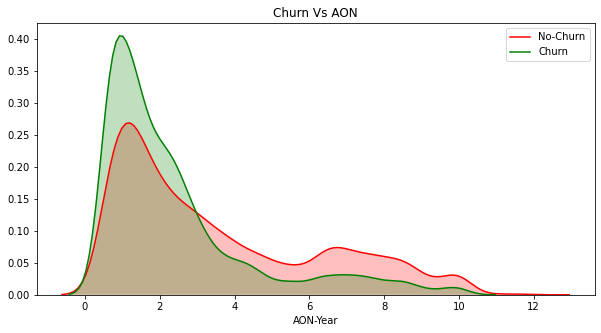

In [65]:
# Understanding the Churn trend w.r.t the Age Of Network

plt.figure(figsize=[10,5])
ax = sns.kdeplot(tele_hvc_df.aon[(tele_hvc_df["churn"] == 0)]/365,
                color="Red", shade = True)
ax = sns.kdeplot(tele_hvc_df.aon[(tele_hvc_df["churn"] == 1)]/365,
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_xlabel('AON-Year')
ax.set_title('Churn Vs AON')
plt.show()

- **We see a high churn during the first 2 year of the network.**
- **Als0, the customers that havent churn decides to keep the network on a longer run**

In [66]:
# Binning the customers w.r.t AON into 1, 2, 3, 4, 6, 8 & 12 

tele_hvc_df['AON_bin'] = np.round(tele_hvc_df['aon']/365,1)
bins = [0, 1, 2, 3, 4, 6, 8, 12]
tele_hvc_df['AON_bin'] = pd.cut(tele_hvc_df['AON_bin'], bins)
tele_hvc_df['AON_bin'].value_counts()

(1, 2]     7498
(0, 1]     5327
(2, 3]     4532
(6, 8]     3963
(4, 6]     3166
(3, 4]     2963
(8, 12]    2562
Name: AON_bin, dtype: int64

In [67]:
tele_hvc_df.shape

(30011, 114)

# Correlation matrix
### Dropping Columns with correlation more than 80%

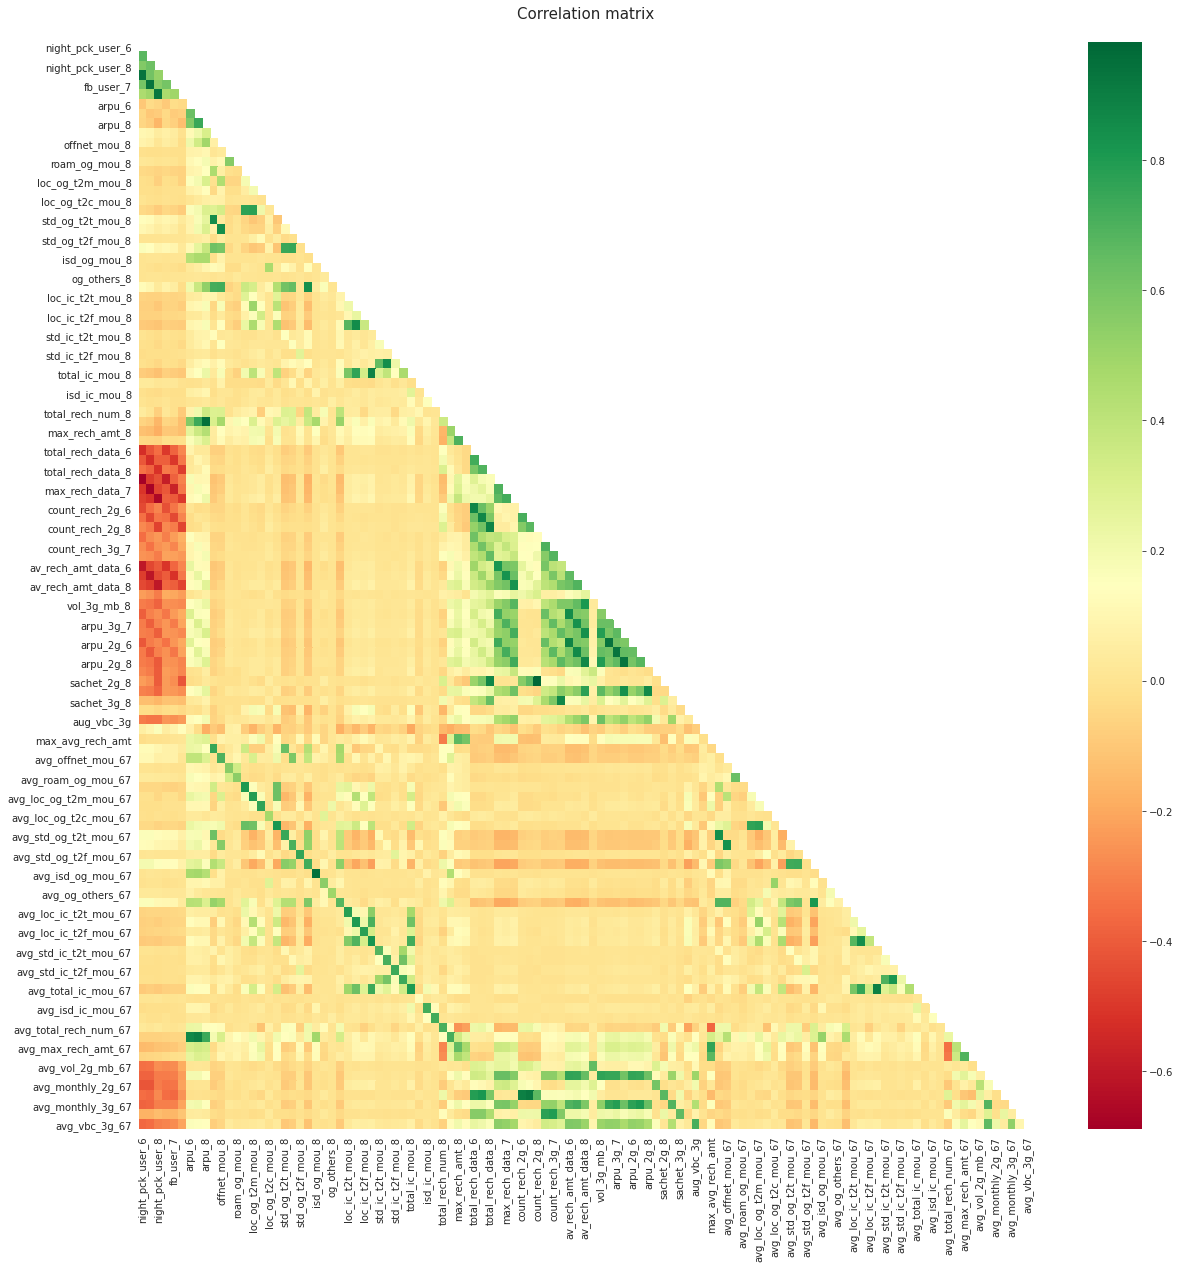

In [68]:
# Correlation plot among the numerical variables:

plt.figure(figsize=[20,20])
corr = tele_hvc_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    sns.heatmap(corr,mask=mask,cmap="RdYlGn")
plt.title('Correlation matrix\n',fontdict={'fontsize':15,'fontweight':5})
plt.show()

In [69]:
# It is observed that the existing categorical fields with user details have higher correlaiton.
# Hence dropping these columns
tele_hvc_df.drop(columns=['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8'],axis=1,inplace=True)
tele_hvc_df.shape

(30011, 108)

In [70]:
# Veriables with more than 75% correlation

cor = tele_hvc_df.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.75) | (cor < -0.75)].sort_values()

std_og_mou_8           std_og_t2m_mou_8         0.750446
avg_vol_3g_mb_67       arpu_3g_6                0.753026
                       arpu_2g_6                0.754718
                       av_rech_amt_data_7       0.757714
avg_total_ic_mou_67    avg_loc_ic_t2m_mou_67    0.757904
avg_monthly_3g_67      arpu_3g_6                0.758616
avg_std_og_t2f_mou_67  std_og_t2f_mou_8         0.759160
avg_loc_og_t2f_mou_67  loc_og_t2f_mou_8         0.760472
avg_vol_3g_mb_67       vol_3g_mb_8              0.761558
avg_loc_og_mou_67      avg_loc_og_t2t_mou_67    0.762158
avg_max_rech_amt_67    max_avg_rech_amt         0.762581
total_ic_mou_8         loc_ic_t2m_mou_8         0.764392
avg_vol_3g_mb_67       av_rech_amt_data_6       0.765039
loc_og_mou_8           loc_og_t2t_mou_8         0.767334
avg_monthly_3g_67      arpu_2g_6                0.769798
avg_loc_og_mou_67      avg_loc_og_t2m_mou_67    0.773546
loc_og_mou_8           loc_og_t2m_mou_8         0.773766
monthly_3g_8           av_rech_

In [71]:
# Dropping variables that contributes to correlaiton > 75%

cor = pd.DataFrame(cor[(cor > 0.75) | (cor < -0.75)].sort_values())

cor.reset_index(inplace=True)

high_cor = list(set(cor['level_0'].tolist()))

print('Total No.of column dropped: {}'.format(len(high_cor)))

tele_hvc_df.drop(columns=high_cor,axis=1,inplace=True)

Total No.of column dropped: 46


In [72]:
tele_hvc_df.shape

(30011, 62)

# Outlier Treatment:

In [73]:
# Outlier inspection of numerical variables:

    # Extracting numerical variables
outlier_cl = list(tele_hvc_df.columns)
for i in catg_cl:
    if i in outlier_cl:
        outlier_cl.remove(i)
        
    #removing churn & AON_bin from finding the outliers
outlier_cl.remove('churn')
outlier_cl.remove('AON_bin')
    # Percentile observation
tele_hvc_df[outlier_cl].describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_8,monthly_2g_8,aon,aug_vbc_3g,max_avg_rech_amt,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_monthly_2g_67,avg_vbc_3g_67
count,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.284404,589.135427,534.857433,268.61183,377.901545,13.25627,21.469272,87.506619,168.852659,6.494314,1.712739,1.789728,2.029314,6.885193,0.059131,66.437989,155.448820,14.735579,15.051559,30.498213,2.680925,0.027660,11.700835,1.237756,10.225317,162.869348,95.653294,0.937056,1.053880,1.035287,56.909666,58.679284,55.258072,0.311819,0.335344,0.313618,69.209105,0.114058,1264.064776,129.439626,108.973847,300.532673,421.899012,15.467439,25.678826,1.714694,405.214257,6.670925,0.370053,16.561536,32.767142,2.933727,0.042399,11.758360,1.332846,12.017394,104.886392,78.515195,0.128103,128.243825
std,442.722413,462.897814,492.259586,466.01448,475.492462,74.55207,106.244774,234.594665,234.065949,20.220028,7.397562,11.700376,44.794926,22.893414,3.320320,155.515027,215.971806,43.704580,72.433104,105.291151,20.269535,0.116574,74.928607,12.889879,9.478572,172.605809,145.260363,2.176930,2.412576,2.405187,105.811594,108.137996,104.787395,1.065718,1.176000,1.161561,268.494284,0.357272,975.263117,390.478591,118.726361,436.836531,440.112766,67.369363,94.737246,6.703410,574.891474,18.350992,1.845355,76.238080,95.182907,18.804091,0.152451,67.199626,13.396755,8.729543,115.077568,254.201180,0.336706,366.111430
min,-2258.709000,-2014.045000,-945.808000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,7.066176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
1%,18.231900,25.782700,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,16.767419,0.230500,8.961000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [74]:
# no.of rows effected above 90th percentile and no.of rows below 1st percentile if we do soft capping:
p1_clm = []
p99_clm = []

for i in outlier_cl:
    pctl = tele_hvc_df[i].quantile([0.01,0.99]).values
    
    print('***********\nVARIABLE: {}'.format(i))
    
    print('   >>no.of rows below 1st percentile: {} , effects {:.2%} of data '.
          format(tele_hvc_df[tele_hvc_df[i] <= pctl[0]].shape[0],
                 tele_hvc_df[tele_hvc_df[i] <= pctl[0]].shape[0]/tele_hvc_df.shape[0]))
    
    print('   >>no.of rows above 99th percentile: {} , effects {:.2%} of data \n'.
          format(tele_hvc_df[tele_hvc_df[i] >= pctl[1]].shape[0],
                 tele_hvc_df[tele_hvc_df[i] >= pctl[1]].shape[0]/tele_hvc_df.shape[0]))
    
#     Seggregating columns so that we can treat columns that would effect <20% of data

    if tele_hvc_df[tele_hvc_df[i] <= pctl[0]].shape[0]/tele_hvc_df.shape[0] <=0.2:
        p1_clm.append(i)
    elif tele_hvc_df[tele_hvc_df[i] >= pctl[1]].shape[0]/tele_hvc_df.shape[0] <=0.2:
        p99_clm.append(i)

***********
VARIABLE: arpu_6
   >>no.of rows below 1st percentile: 301 , effects 1.00% of data 
   >>no.of rows above 99th percentile: 301 , effects 1.00% of data 

***********
VARIABLE: arpu_7
   >>no.of rows below 1st percentile: 301 , effects 1.00% of data 
   >>no.of rows above 99th percentile: 301 , effects 1.00% of data 

***********
VARIABLE: arpu_8
   >>no.of rows below 1st percentile: 932 , effects 3.11% of data 
   >>no.of rows above 99th percentile: 301 , effects 1.00% of data 

***********
VARIABLE: onnet_mou_8
   >>no.of rows below 1st percentile: 1098 , effects 3.66% of data 
   >>no.of rows above 99th percentile: 301 , effects 1.00% of data 

***********
VARIABLE: offnet_mou_8
   >>no.of rows below 1st percentile: 518 , effects 1.73% of data 
   >>no.of rows above 99th percentile: 301 , effects 1.00% of data 

***********
VARIABLE: roam_ic_mou_8
   >>no.of rows below 1st percentile: 24058 , effects 80.16% of data 
   >>no.of rows above 99th percentile: 301 , effects 1.00

   >>no.of rows below 1st percentile: 3222 , effects 10.74% of data 
   >>no.of rows above 99th percentile: 301 , effects 1.00% of data 

***********
VARIABLE: avg_std_ic_t2f_mou_67
   >>no.of rows below 1st percentile: 18945 , effects 63.13% of data 
   >>no.of rows above 99th percentile: 301 , effects 1.00% of data 

***********
VARIABLE: avg_spl_ic_mou_67
   >>no.of rows below 1st percentile: 22586 , effects 75.26% of data 
   >>no.of rows above 99th percentile: 304 , effects 1.01% of data 

***********
VARIABLE: avg_isd_ic_mou_67
   >>no.of rows below 1st percentile: 20456 , effects 68.16% of data 
   >>no.of rows above 99th percentile: 301 , effects 1.00% of data 

***********
VARIABLE: avg_ic_others_67
   >>no.of rows below 1st percentile: 18993 , effects 63.29% of data 
   >>no.of rows above 99th percentile: 302 , effects 1.01% of data 

***********
VARIABLE: avg_total_rech_num_67
   >>no.of rows below 1st percentile: 508 , effects 1.69% of data 
   >>no.of rows above 99th perce

In [75]:
# Columns that needed to be lower capped at P1 
print(p1_clm)

for i in p1_clm:
    pctl = tele_hvc_df[i].quantile([0.01,0.99]).values
    tele_hvc_df[i][tele_hvc_df[i] <= pctl[0]] = pctl[0]

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'total_rech_num_8', 'max_rech_amt_8', 'aon', 'max_avg_rech_amt', 'avg_onnet_mou_67', 'avg_offnet_mou_67', 'avg_std_og_mou_67', 'avg_std_ic_t2m_mou_67', 'avg_total_rech_num_67', 'avg_last_day_rch_amt_67']


In [76]:
# columns that needed to be upper capped at P99
print(p99_clm)

for i in p99_clm:
    pctl = tele_hvc_df[i].quantile([0.01,0.99]).values
    tele_hvc_df[i][tele_hvc_df[i] >= pctl[1]] = pctl[1]

['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'last_day_rch_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_8', 'monthly_2g_8', 'aug_vbc_3g', 'avg_roam_ic_mou_67', 'avg_roam_og_mou_67', 'avg_loc_og_t2c_mou_67', 'avg_spl_og_mou_67', 'avg_og_others_67', 'avg_std_ic_t2t_mou_67', 'avg_std_ic_t2f_mou_67', 'avg_spl_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_ic_others_67', 'avg_vol_2g_mb_67', 'avg_monthly_2g_67', 'avg_vbc_3g_67']


In [77]:
# Lets drop 'og_others_8' as the % of fields effected are above 90 at both the ends
tele_hvc_df.drop(columns=['og_others_8'],axis=1,inplace=True)
tele_hvc_df.shape
outlier_cl.remove('og_others_8')

In [78]:
# Percentile observation
tele_hvc_df[outlier_cl].describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_8,monthly_2g_8,aon,aug_vbc_3g,max_avg_rech_amt,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_monthly_2g_67,avg_vbc_3g_67
count,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.671490,589.692821,534.920778,268.61183,377.901545,10.593967,17.576605,87.506619,168.852659,5.889841,1.473665,1.276300,0.554784,6.018014,66.437989,155.448820,13.291119,12.136009,26.403083,1.936273,0.025970,8.499376,0.749592,10.225317,162.869348,91.667555,0.880544,0.995135,0.967712,55.068808,56.668622,53.570424,0.273533,0.297258,0.278131,61.649530,0.112792,1264.109726,120.429564,108.998203,300.534644,421.956001,13.132358,22.646383,1.483280,405.214257,6.041620,0.321519,13.495104,32.767142,2.187547,0.039965,9.014012,0.857357,12.025541,104.886392,72.090708,0.125904,120.497096
std,441.825346,461.825078,492.154816,466.01448,475.492462,40.368634,62.798347,234.594665,234.065949,13.917091,4.430822,5.280085,3.595169,12.268462,155.515027,215.971806,29.287542,31.450669,56.311471,6.875614,0.101046,33.201557,2.900702,9.478572,172.605809,110.324508,1.716967,1.934751,1.837208,94.209801,95.670226,94.074535,0.713360,0.805040,0.782205,193.316945,0.347658,975.213422,318.459109,118.707053,436.835175,440.058814,41.463257,66.974356,3.643283,574.891474,10.881191,0.830974,30.953671,95.182907,6.994620,0.088025,32.772812,2.837405,8.720123,115.077568,196.983072,0.324524,307.868012
min,18.231900,25.782700,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,16.767419,0.230500,8.961000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000
1%,18.233610,25.794130,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,16.768097,0.230950,8.961900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000
10%,270.491000,274.341000

# Visulizing the Data

## Data Imbalance

In [79]:
# Considering the Target variable to verify if any imbalance exists between Defaulter & a Non-Defaulter
vlv=pd.DataFrame(tele_hvc_df.churn.value_counts(normalize=True))
vlv

,churn
0,0.913598
1,0.086402


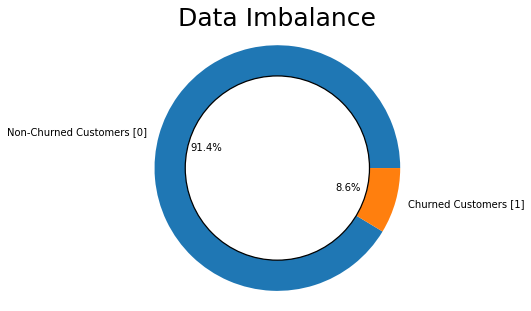

In [80]:
# plotting the above imbalance as a pie-chart for better visvualization

plt.figure(figsize=[8,5])

lbl = ['Non-Churned Customers [0]','Churned Customers [1]']

plt.pie(vlv.churn, labels=lbl,autopct='%1.1f%%')

centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

plt.title('Data Imbalance',fontsize=25)

plt.show()

## Univariate Analysis of Good Phase & Action Phase parameters

29


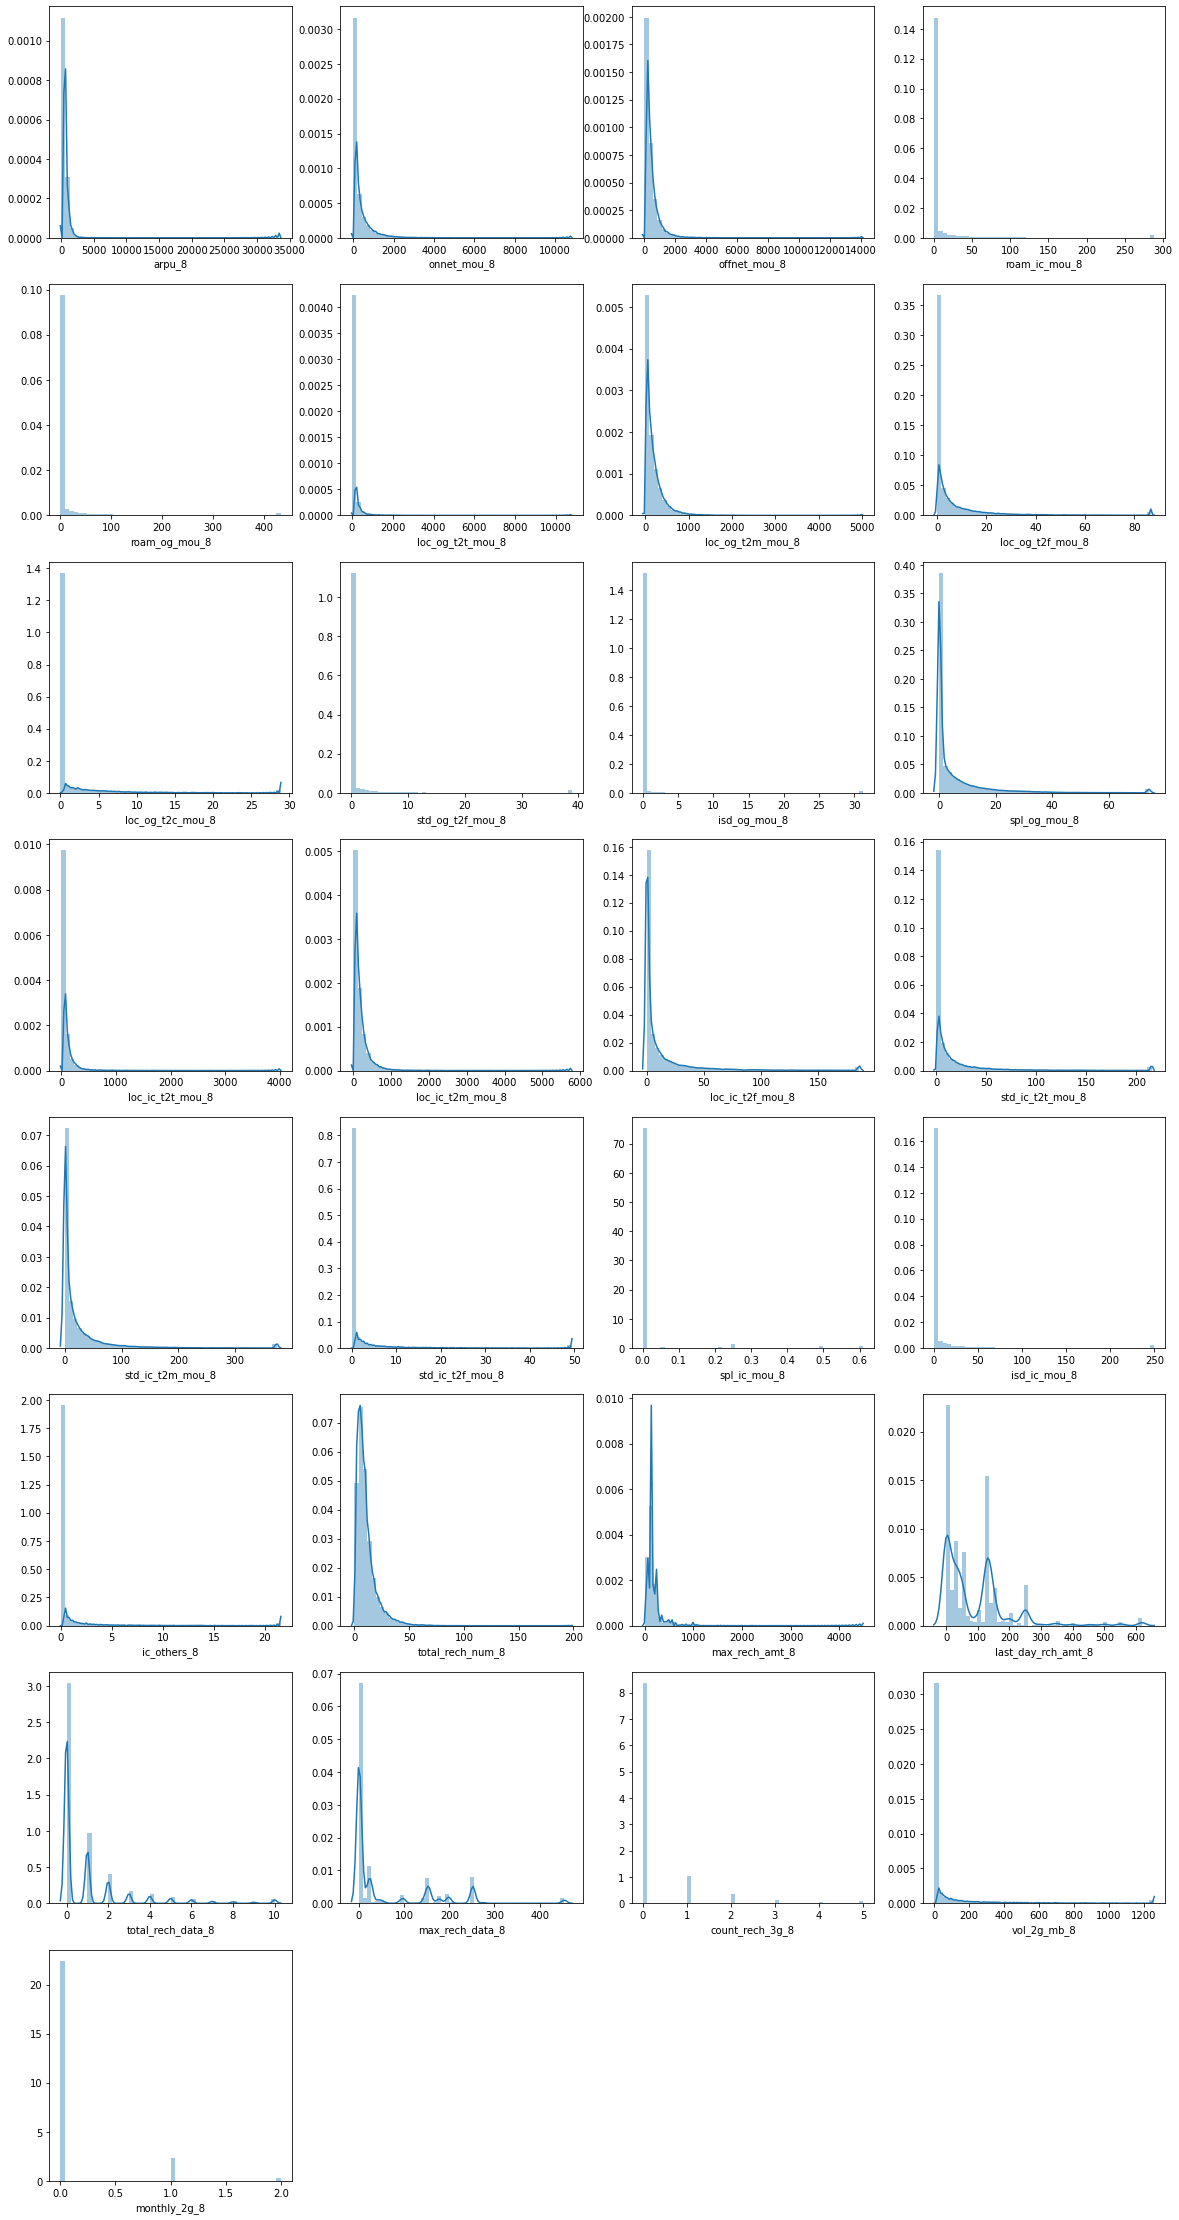

In [81]:
# Univariate analysis for all the variables of 8 months
all_cols_8 = list(tele_hvc_df.columns[tele_hvc_df.columns.str.contains('_8')])
print(len(all_cols_8))

j=1
plt.figure(figsize=(20,40))
for i in all_cols_8:
    
    plt.subplot(8,4,j)

    sns.distplot(tele_hvc_df[i])
    j=j+1


19


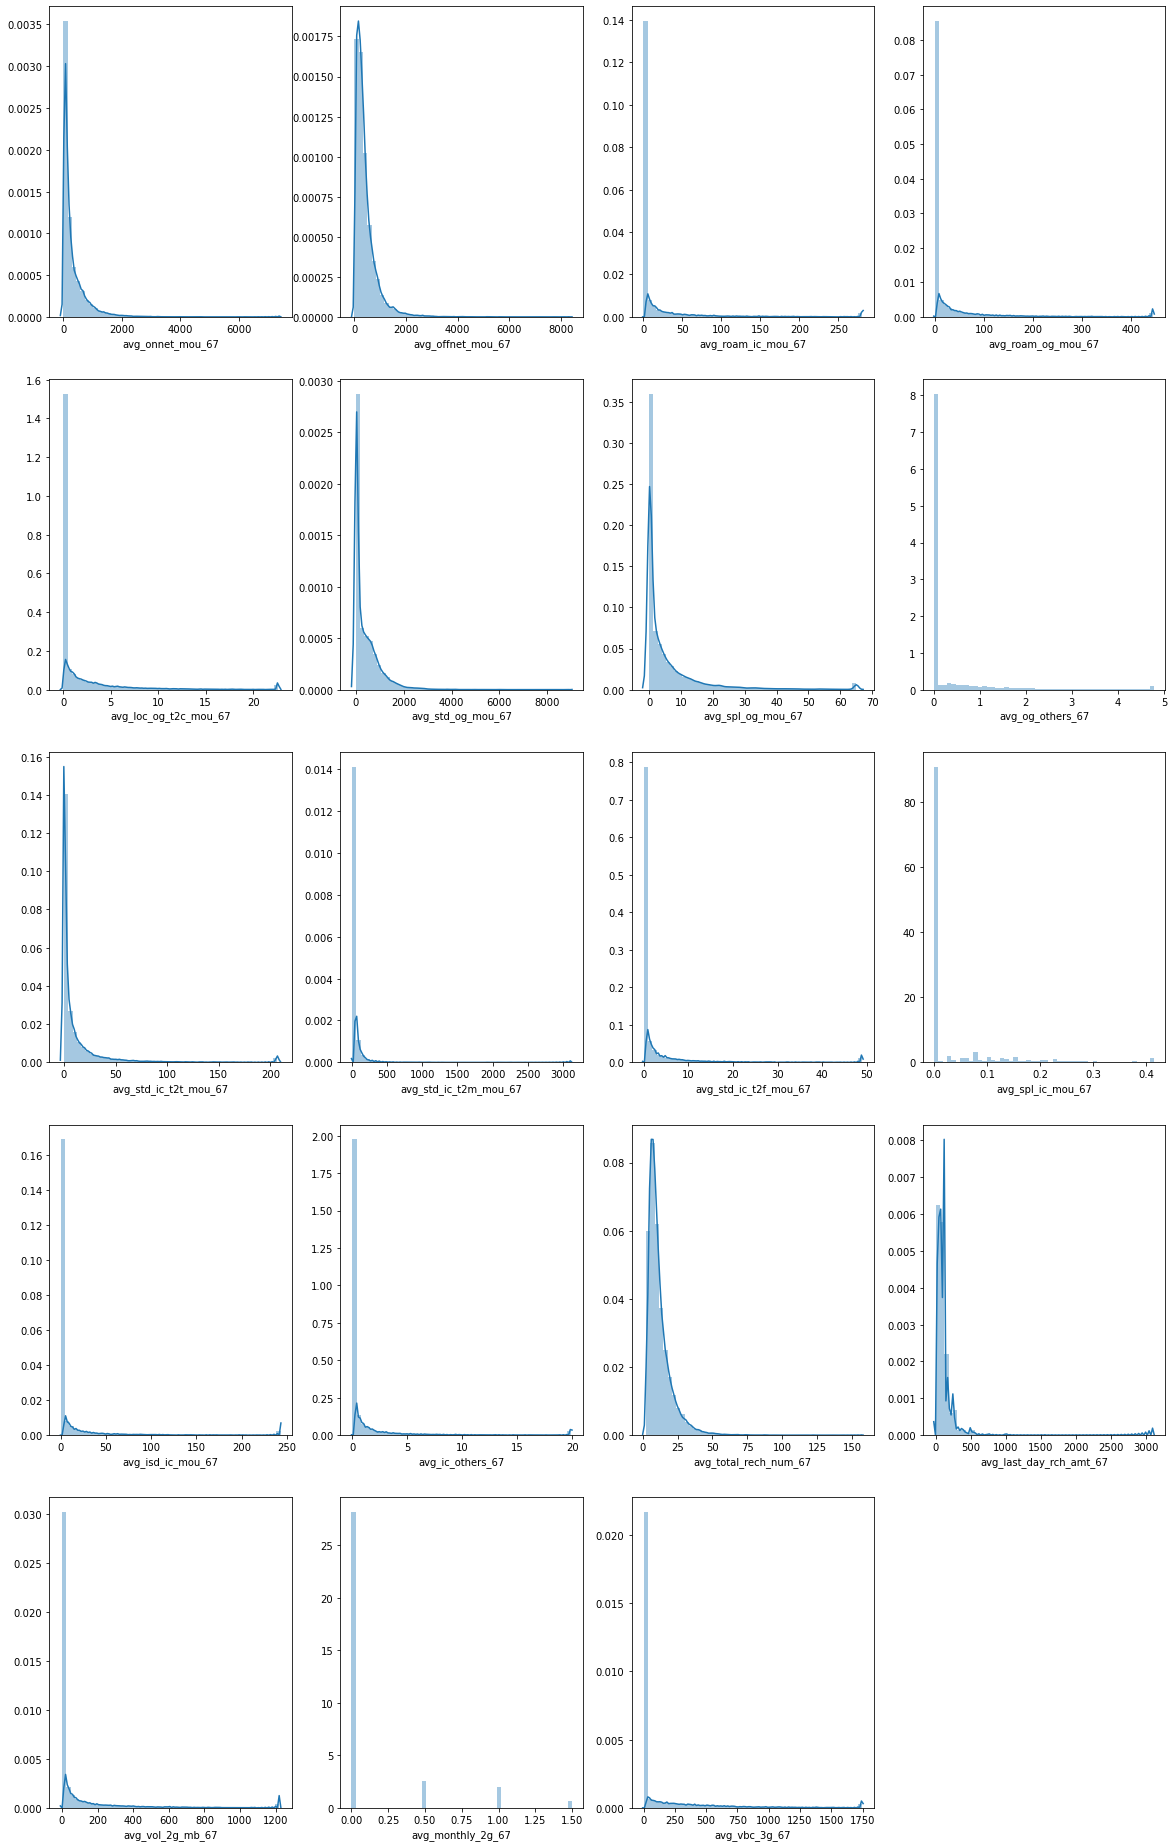

In [82]:
# Univariate analysis for all the variables of 6/7 months
all_cols_67 = list(tele_hvc_df.columns[tele_hvc_df.columns.str.contains('_67')])
print(len(all_cols_67))

j=1
plt.figure(figsize=(20,40))
for i in all_cols_67:
    
    plt.subplot(6,4,j)

    sns.distplot(tele_hvc_df[i])
    j=j+1

- **Most of the variables are left skewed towards 0, which is also correct as this data mostly talks about minutes of usage, avg recharge amount, data usage etc which has limited usage by most the people.**

## On-net & Off-net mou between Good phase & Action phase Vs Churn in customers

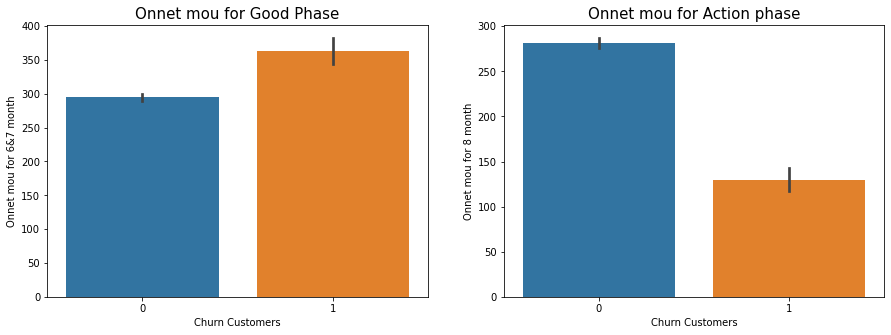

In [83]:
# Onnet mou Vs Churn

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.barplot(x=tele_hvc_df.churn,y=tele_hvc_df['avg_onnet_mou_67']).set(xlabel='Churn Customers', ylabel='Onnet mou for 6&7 month')
plt.title('Onnet mou for Good Phase',fontdict={'fontsize':15,'fontweight':5})

plt.subplot(1,2,2)
sns.barplot(x=tele_hvc_df.churn,y=tele_hvc_df['onnet_mou_8']).set(xlabel='Churn Customers', ylabel='Onnet mou for 8 month')
plt.title('Onnet mou for Action phase',fontdict={'fontsize':15,'fontweight':5})

plt.show()

- **On net Minute of Usage for Churned customers in the Good phase is more than during the Action phase as expected**
- **Similary in case of the returning customers, i.e. Churn = 0 we can see the opposite of above**

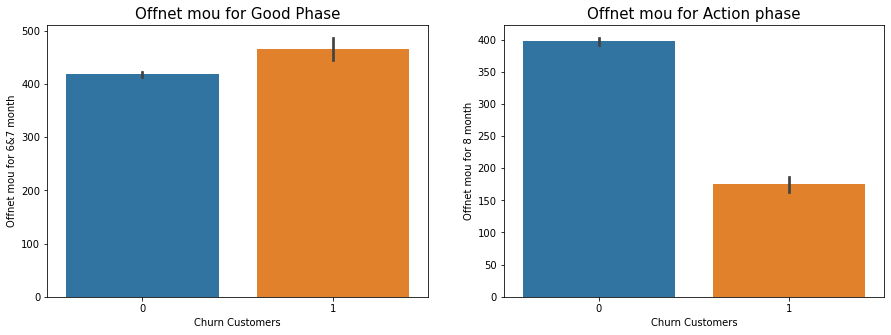

In [84]:
# Offnet mou Vs Churn

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.barplot(x=tele_hvc_df.churn,y=tele_hvc_df['avg_offnet_mou_67']).set(xlabel='Churn Customers', ylabel='Offnet mou for 6&7 month')
plt.title('Offnet mou for Good Phase',fontdict={'fontsize':15,'fontweight':5})

plt.subplot(1,2,2)
sns.barplot(x=tele_hvc_df.churn,y=tele_hvc_df['offnet_mou_8']).set(xlabel='Churn Customers', ylabel='Offnet mou for 8 month')
plt.title('Offnet mou for Action phase',fontdict={'fontsize':15,'fontweight':5})

plt.show()

- **For off-net mou the situation is right the opposite of On-net minute of usage seen.**

## Understanding Age of Network to the Avergae rate per unit for a Churn and retention:

In [85]:
def arpu(c,p,m):
    
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    sns.barplot(x='AON_bin',y=c ,data=tele_hvc_df[tele_hvc_df['churn']==0],palette='GnBu')
    plt.title('{} Phase: {} Vs AON for Retention'.format(p,m),fontdict={'fontsize':15,'fontweight':5})
    plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    sns.barplot(x='AON_bin',y=c ,data=tele_hvc_df[tele_hvc_df['churn']==1],palette='OrRd')
    plt.title('{} Phase: {} Vs AON for Churn'.format(p,m),fontdict={'fontsize':15,'fontweight':5})
    plt.xticks(rotation=45)

    plt.show()

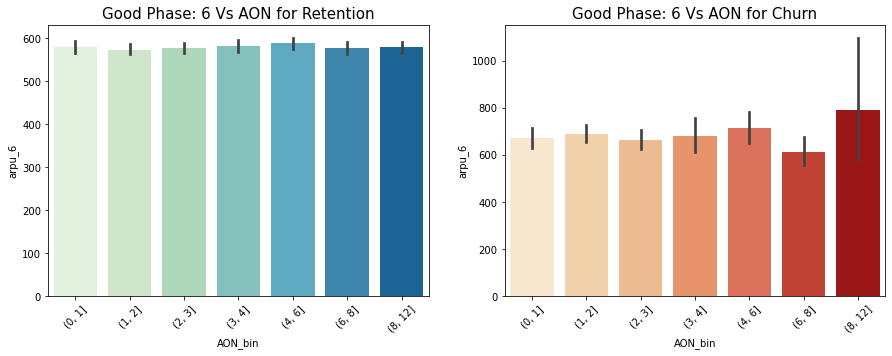

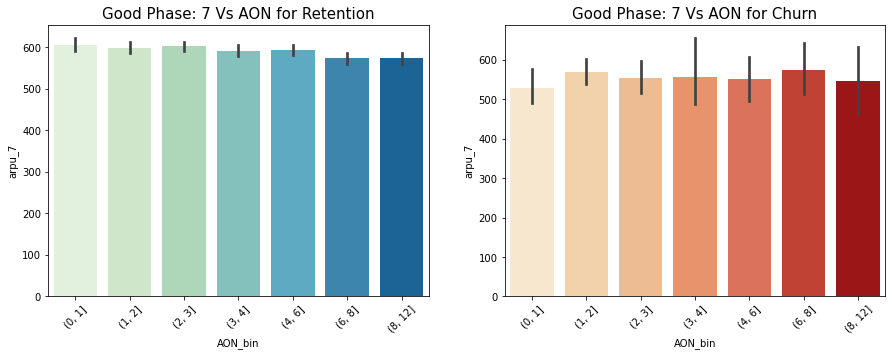

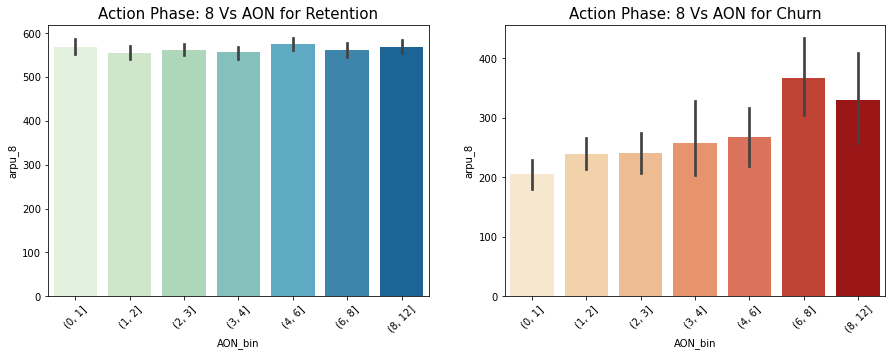

In [86]:

arp_dic = {6:['arpu_6','Good'],7:['arpu_7','Good'],8:['arpu_8','Action']}

for i,j in arp_dic.items():
    arpu(j[0],j[1],i)


- **For churned customers during Action phase ( month:8 ), it is observed that the Avergae rate per unit increase w.r.t Age of Netwrok which may be contributing towards the attretion of customers**
- **Meanwhile during the good phase, the trend is seen almost constant through out the age of the network.**

# Data Preprocessing

### Encoding Dummy Variables

In [87]:
# Dummy encoding by dropping first column from variables:

dummy1 = pd.get_dummies(tele_hvc_df['AON_bin'],prefix='AON_bin_', drop_first=True)
dummy1.head()

,"AON_bin__(1, 2]","AON_bin__(2, 3]","AON_bin__(3, 4]","AON_bin__(4, 6]","AON_bin__(6, 8]","AON_bin__(8, 12]"
7,0,1,0,0,0,0
8,0,0,0,0,0,0
13,0,0,0,0,1,0
16,1,0,0,0,0,0
17,1,0,0,0,0,0


In [88]:
tele_hvc_df = pd.concat([tele_hvc_df,dummy1], axis=1)
tele_hvc_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_8,monthly_2g_8,aon,aug_vbc_3g,churn,max_avg_rech_amt,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_monthly_2g_67,avg_vbc_3g_67,AON_bin,"AON_bin__(1, 2]","AON_bin__(2, 3]","AON_bin__(3, 4]","AON_bin__(4, 6]","AON_bin__(6, 8]","AON_bin__(8, 12]"
7,1069.180,1349.8500,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,16.68,10.01,6.50,27.31,121.19,39.53,30.39,141.33,22.21,0.0,31.590,15.14,7,1580,619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,802,57.74,1,519.714286,56.260,510.295,24.860,18.165,0.0,68.000,2.25,0.000,24.360,109.215,43.215,0.105,8.295,15.465,5.0,0.0,0.0,0.0,19.060,"(2, 3]",0,1,0,0,0,0
8,378.721,492.2230,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,0.00,0.00,10.23,0.31,15.48,0.00,0.10,0.65,0.00,0.0,0.000,0.00,14,30,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,0.0,0.0,0.03,0,315,21.03,0,28.619048,382.360,87.645,0.000,0.000,0.0,136.870,0.00,0.000,0.290,13.255,0.000,0.000,0.000,0.000,20.0,25.0,178.0,0.5,516.405,"(0, 1]",0,0,0,0,0,0
13,492.846,205.6710,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,0.00,1.29,4.78,52.58,195.18,7.49,154.58,317.91,1.91,0.0,249.888,21.44,11,130,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,0.0,0.02,0,2607,0.00,0,84.500000,305.075,266.295,83.885,21.620,0.0,420.355,0.00,0.000,76.985,168.960,0.000,0.225,153.695,19.885,5.0,80.0,0.0,0.0,0.000,"(6, 8]",0,0,0,0,1,0
16,430.975,299.8690,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,0.00,0.00,5.91,28.89,150.16,32.71,6.33,73.93,2.18,0.0,0.230,0.00,2,130,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,511,0.00,0,80.000000,62.260,263.015,1.415,8.870,0.0,48.990,1.63,0.000,73.715,45.880,0.255,0.000,0.000,0.000,8.0,100.0,0.0,0.0,12.170,"(1, 2]",1,0,0,0,0,0
17,690.008,25.7827,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.00,4,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,667,0.00,0,42.947368,597.595,30.820,2.380,4.230,0.0,574.635,1.29,0.465,4.315,0.640,0.000,0.000,0.000,0.000,10.5,15.0,0.0,0.0,0.000,"(1, 2]",1,0,0,0,0,0


In [89]:
# Removing existing categorical variables post dummy encoding

tele_hvc_df = tele_hvc_df.drop('AON_bin', axis=1)
tele_hvc_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_8,monthly_2g_8,aon,aug_vbc_3g,churn,max_avg_rech_amt,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_monthly_2g_67,avg_vbc_3g_67,"AON_bin__(1, 2]","AON_bin__(2, 3]","AON_bin__(3, 4]","AON_bin__(4, 6]","AON_bin__(6, 8]","AON_bin__(8, 12]"
7,1069.180,1349.8500,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,16.68,10.01,6.50,27.31,121.19,39.53,30.39,141.33,22.21,0.0,31.590,15.14,7,1580,619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,802,57.74,1,519.714286,56.260,510.295,24.860,18.165,0.0,68.000,2.25,0.000,24.360,109.215,43.215,0.105,8.295,15.465,5.0,0.0,0.0,0.0,19.060,0,1,0,0,0,0
8,378.721,492.2230,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,0.00,0.00,10.23,0.31,15.48,0.00,0.10,0.65,0.00,0.0,0.000,0.00,14,30,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,0.0,0.0,0.03,0,315,21.03,0,28.619048,382.360,87.645,0.000,0.000,0.0,136.870,0.00,0.000,0.290,13.255,0.000,0.000,0.000,0.000,20.0,25.0,178.0,0.5,516.405,0,0,0,0,0,0
13,492.846,205.6710,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,0.00,1.29,4.78,52.58,195.18,7.49,154.58,317.91,1.91,0.0,249.888,21.44,11,130,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,0.0,0.02,0,2607,0.00,0,84.500000,305.075,266.295,83.885,21.620,0.0,420.355,0.00,0.000,76.985,168.960,0.000,0.225,153.695,19.885,5.0,80.0,0.0,0.0,0.000,0,0,0,0,1,0
16,430.975,299.8690,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,0.00,0.00,5.91,28.89,150.16,32.71,6.33,73.93,2.18,0.0,0.230,0.00,2,130,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,511,0.00,0,80.000000,62.260,263.015,1.415,8.870,0.0,48.990,1.63,0.000,73.715,45.880,0.255,0.000,0.000,0.000,8.0,100.0,0.0,0.0,12.170,1,0,0,0,0,0
17,690.008,25.7827,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.00,4,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,667,0.00,0,42.947368,597.595,30.820,2.380,4.230,0.0,574.635,1.29,0.465,4.315,0.640,0.000,0.000,0.000,0.000,10.5,15.0,0.0,0.0,0.000,1,0,0,0,0,0


In [90]:
df = tele_hvc_df[:].copy()

In [91]:
df.shape

(30011, 66)

### Rescaling & Test-Train Split

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
# Putting feature variable to X

X = df.drop('churn', axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_8,monthly_2g_8,aon,aug_vbc_3g,max_avg_rech_amt,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_monthly_2g_67,avg_vbc_3g_67,"AON_bin__(1, 2]","AON_bin__(2, 3]","AON_bin__(3, 4]","AON_bin__(4, 6]","AON_bin__(6, 8]","AON_bin__(8, 12]"
7,1069.180,1349.8500,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,16.68,10.01,6.50,27.31,121.19,39.53,30.39,141.33,22.21,0.0,31.590,15.14,7,1580,619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,802,57.74,519.714286,56.260,510.295,24.860,18.165,0.0,68.000,2.25,0.000,24.360,109.215,43.215,0.105,8.295,15.465,5.0,0.0,0.0,0.0,19.060,0,1,0,0,0,0
8,378.721,492.2230,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,0.00,0.00,10.23,0.31,15.48,0.00,0.10,0.65,0.00,0.0,0.000,0.00,14,30,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,0.0,0.0,0.03,0,315,21.03,28.619048,382.360,87.645,0.000,0.000,0.0,136.870,0.00,0.000,0.290,13.255,0.000,0.000,0.000,0.000,20.0,25.0,178.0,0.5,516.405,0,0,0,0,0,0
13,492.846,205.6710,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,0.00,1.29,4.78,52.58,195.18,7.49,154.58,317.91,1.91,0.0,249.888,21.44,11,130,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,0.0,0.02,0,2607,0.00,84.500000,305.075,266.295,83.885,21.620,0.0,420.355,0.00,0.000,76.985,168.960,0.000,0.225,153.695,19.885,5.0,80.0,0.0,0.0,0.000,0,0,0,0,1,0
16,430.975,299.8690,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,0.00,0.00,5.91,28.89,150.16,32.71,6.33,73.93,2.18,0.0,0.230,0.00,2,130,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,511,0.00,80.000000,62.260,263.015,1.415,8.870,0.0,48.990,1.63,0.000,73.715,45.880,0.255,0.000,0.000,0.000,8.0,100.0,0.0,0.0,12.170,1,0,0,0,0,0
17,690.008,25.7827,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.00,4,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0,667,0.00,42.947368,597.595,30.820,2.380,4.230,0.0,574.635,1.29,0.465,4.315,0.640,0.000,0.000,0.000,0.000,10.5,15.0,0.0,0.0,0.000,1,0,0,0,0,0


In [94]:
# Putting response variable to y
y = df['churn']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [95]:
# Columns in tele_df
numlist = list(df.columns)

# dummy variables into a list
bin_list = list(X.columns[X.columns.str.contains('bin')])

# Extracting numerical variables
for i in bin_list:
    if i in numlist:
        numlist.remove(i)
numlist.remove('churn')

X[numlist].describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_8,monthly_2g_8,aon,aug_vbc_3g,max_avg_rech_amt,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2c_mou_67,avg_std_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_monthly_2g_67,avg_vbc_3g_67
count,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,587.671490,589.692821,534.920778,268.61183,377.901545,10.593967,17.576605,87.506619,168.852659,5.889841,1.473665,1.276300,0.554784,6.018014,66.437989,155.448820,13.291119,12.136009,26.403083,1.936273,0.025970,8.499376,0.749592,10.225317,162.869348,91.667555,0.880544,0.995135,0.967712,55.068808,56.668622,53.570424,0.273533,0.297258,0.278131,61.649530,0.112792,1264.109726,120.429564,108.998203,300.534644,421.956001,13.132358,22.646383,1.483280,405.214257,6.041620,0.321519,13.495104,32.767142,2.187547,0.039965,9.014012,0.857357,12.025541,104.886392,72.090708,0.125904,120.497096
std,441.825346,461.825078,492.154816,466.01448,475.492462,40.368634,62.798347,234.594665,234.065949,13.917091,4.430822,5.280085,3.595169,12.268462,155.515027,215.971806,29.287542,31.450669,56.311471,6.875614,0.101046,33.201557,2.900702,9.478572,172.605809,110.324508,1.716967,1.934751,1.837208,94.209801,95.670226,94.074535,0.713360,0.805040,0.782205,193.316945,0.347658,975.213422,318.459109,118.707053,436.835175,440.058814,41.463257,66.974356,3.643283,574.891474,10.881191,0.830974,30.953671,95.182907,6.994620,0.088025,32.772812,2.837405,8.720123,115.077568,196.983072,0.324524,307.868012
min,18.231900,25.782700,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,16.767419,0.230500,8.961000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000
25%,364.161000,365.004500,289.609500,32.36000,95.695000,0.000000,0.000000,7.760000,28.480000,0.000000,0.000000,0.000000,0.000000,0.000000,8.570000,35.890000,0.000000,0.000000,0.310000,0.000000,0.000000,0.000000,0.000000,4.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,52.297059,48.625000,155.050000,0.000000,0.000000,0.000000,10.227500,0.000000,0.000000,0.000000,1.747500,0.000000,0.000000,0.000000,0.000000,6.500000,40.000000,0.000000,0.000000,0.000000
50%,495.68

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [97]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42,stratify=df.churn)

In [98]:
X_train.shape, X_test.shape

((21007, 65), (9004, 65))

In [99]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(0    0.9136
 1    0.0864
 Name: churn, dtype: float64,
 0    0.913594
 1    0.086406
 Name: churn, dtype: float64)

## PCA

In [100]:
# apply pca to train data
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [101]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [102]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      10.33
1      17.52
2      24.25
3      28.81
4      32.67
5      36.15
6      39.53
7      42.77
8      45.84
9      48.90
10     51.30
11     53.63
12     55.78
13     57.71
14     59.59
15     61.42
16     63.18
17     64.92
18     66.65
19     68.35
20     69.99
21     71.48
22     72.92
23     74.30
24     75.60
25     76.86
26     78.07
27     79.28
28     80.46
29     81.59
30     82.69
31     83.75
32     84.79
33     85.80
34     86.72
35     87.60
36     88.45
37     89.26
38     90.04
39     90.79
40     91.52
41     92.18
42     92.81
43     93.42
44     93.98
45     94.50
46     95.01
47     95.46
48     95.89
49     96.30
50     96.70
51     97.06
52     97.42
53     97.76
54     98.09
55     98.40
56     98.71
57     99.00
58     99.22
59     99.42
60     99.62
61     99.80
62     99.92
63     99.99
64    100.00
dtype: float64


#### 37 components explains 90% of the variance.

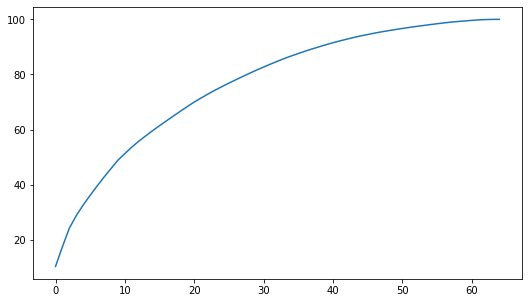

In [103]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## PCA and Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
# create pipeline
PCA_VARS = 37
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [106]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8008758985100205

### Evaluate on Test Data

In [107]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6550 1676]
 [ 137  641]]
AUC:    	 0.88


In [108]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7986450466459352
Precision: 0.2766508416055244
Recall: 0.8239074550128535


### Hyperparameter tuning - PCA and Logistic Regression

In [109]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(random_state=42,class_weight='balanced')

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [110]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   15.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [111]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8889965456349387
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [112]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6681 1545]
 [ 136  642]]
AUC:    	 0.88


In [113]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8133051976899156
Precision: 0.2935528120713306
Recall: 0.8251928020565553


## Model Building #2 - Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42,max_depth=4,class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [115]:
# Evaluating model performance
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [117]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.8729471128671396


array([[16871,  2321],
       [  348,  1467]], dtype=int64)

In [118]:
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))
print("Precision:",metrics.precision_score(y_train, y_train_pred))
print("Recall:",metrics.recall_score(y_train, y_train_pred))

Accuracy: 0.8729471128671396
Precision: 0.38727560718057025
Recall: 0.8082644628099174


In [119]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.8700577521101732


array([[7213, 1013],
       [ 157,  621]], dtype=int64)

In [120]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
print("Precision:",metrics.precision_score(y_test, y_test_pred))
print("Recall:",metrics.recall_score(y_test, y_test_pred))

Accuracy: 0.8700577521101732
Precision: 0.38004895960832313
Recall: 0.7982005141388174


#### Decision Tree using hyper-Parameter Tuning

In [121]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42,class_weight='balanced')

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


In [122]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   32.1s finished


Wall time: 34.6 s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [123]:
# print best hyperparameters
print("Best AUC: ", grid_search.best_score_)
print("Best hyperparameters: ", grid_search.best_params_)

Best AUC:  0.8892275605429959
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}


In [124]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=5, random_state=42)

In [125]:
# predict churn on test data
y_pred = grid_search.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7556  670]
 [ 303  475]]
AUC:    	 0.77


In [126]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8919369169258108
Precision: 0.4148471615720524
Recall: 0.6105398457583547


## Model Building #3 - Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
from sklearn.model_selection import RandomizedSearchCV

In [129]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1,class_weight='balanced')

In [130]:
hyper_params = {'max_depth': range(3, 20),
                'max_features': range(3, 17),
                'min_samples_leaf': range(20, 400, 50),
                'n_estimators': range(10, 101, 10)}

In [131]:
model_rcv = RandomizedSearchCV(estimator=rf, 
             param_distributions=hyper_params,
             verbose=1,
             cv=5,
             n_jobs=-1,
             return_train_score=True,
             n_iter=50)

In [132]:
model_rcv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  3.4min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50),
                                        'n_estimators': range(10, 101, 10)},
                   return_train_score=True, verbose=1)

In [133]:
# print best hyperparameters
print("Best AUC: ", model_rcv.best_score_)
print("Best hyperparameters: ", model_rcv.best_params_)

Best AUC:  0.9185507836181884
Best hyperparameters:  {'n_estimators': 70, 'min_samples_leaf': 20, 'max_features': 14, 'max_depth': 18}


In [134]:
# predict churn on test data
y_pred = model_rcv.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model_rcv.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7688  538]
 [ 177  601]]
AUC:    	 0.93


In [135]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9205908485117725
Precision: 0.5276558384547849
Recall: 0.7724935732647815


#### We can confirm that, Logistic Regression with PCA performs better as a Model.

### Choosing best features using Random Forest Model

In [136]:
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight='balanced', oob_score=True, random_state=42, verbose=1)

8


In [137]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.4s finished


RandomForestClassifier(class_weight='balanced', max_features=8, oob_score=True,
                       random_state=42, verbose=1)

In [138]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8122  104]
 [ 451  327]]
ROC:    	 0.92


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [139]:
## Feature Importance!!
# predictors
features = tele_hvc_df.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,arpu_8,8.984984
1,last_day_rch_amt_8,6.997618
2,loc_og_t2m_mou_8,6.758134
3,loc_ic_t2m_mou_8,6.741324
4,roam_og_mou_8,4.535375
5,roam_ic_mou_8,3.997562
6,loc_og_t2t_mou_8,3.979296
7,loc_ic_t2t_mou_8,3.858107
8,max_rech_amt_8,3.481522
9,loc_ic_t2f_mou_8,2.429096


In [140]:
## Extracting top 30 features
top_n = 30
top_features = feature_importance.variables[0:top_n]

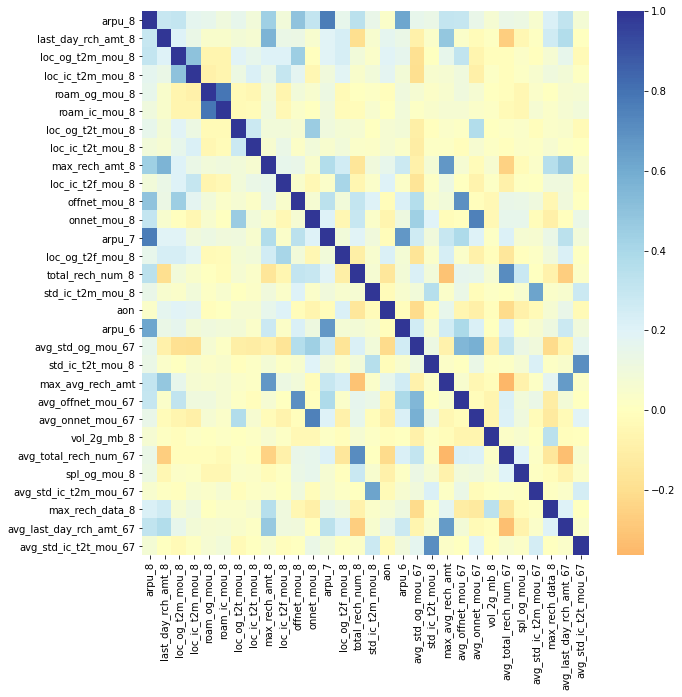

In [141]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap='RdYlBu')

#### We can see that, we don't see much of a correlation so we are good to go with above variables.

In [142]:
top_features = ['arpu_8','last_day_rch_amt_8','loc_og_t2m_mou_8','loc_ic_t2m_mou_8','roam_og_mou_8','roam_ic_mou_8',
                'loc_og_t2t_mou_8','loc_ic_t2t_mou_8','max_rech_amt_8','loc_ic_t2f_mou_8','offnet_mou_8','onnet_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [143]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [144]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [145]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8557265246298394
Best hyperparameters:  {'logistic__C': 3, 'logistic__penalty': 'l2'}


In [146]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6036 2190]
 [ 124  654]]
ROC:    	 0.86


In [147]:
print("Recall/Sensitivity:",round(metrics.recall_score(y_test, y_pred),2))

Recall/Sensitivity: 0.84


#### We are getting recall/sensitivity value as 84% which is quite good after fine tuning logistic model using PCA and top feature selection.

### Extract intercept and coefficients from logistic model

In [148]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [149]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [150]:
# coefficients
coefficients = logistic_model.coef_.reshape((12, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [151]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,arpu_8,last_day_rch_amt_8,loc_og_t2m_mou_8,loc_ic_t2m_mou_8,roam_og_mou_8,roam_ic_mou_8,loc_og_t2t_mou_8,loc_ic_t2t_mou_8,max_rech_amt_8,loc_ic_t2f_mou_8,offnet_mou_8,onnet_mou_8
0,-1.104066,-0.927596,-0.525857,-0.403742,-0.6425,0.401462,0.020726,-0.350889,-0.445191,0.148215,-0.400196,-0.077611,-0.090102


### Insights:
 - Variables from action month i.e. 8th month plays an important role in customer's churn. 'arpu_8' (Average Revenue Per User) and 'last_day_rch_amt_8' (last day's recharge amount) plays vital role in identifying customer's churn.
 - Company needs to come up with good offers (rather good rates for local and roaming customers) for customers who uses more 'local' and 'roaming' calling facilities and we can see that it has direct on customer's churn
